In [2]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.


In [15]:
from google.colab import files
files.upload()  # This will prompt you to upload the file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darshdake","key":"13711069337c06741cd7e035ad71afa4"}'}

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
!kaggle competitions list

ref                                                                                deadline             category                reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2      2025-04-01 23:59:00  Featured         2,117,152 Usd        887           False  
https://www.kaggle.com/competitions/konwinski-prize                                2025-03-12 23:59:00  Featured         1,225,000 Usd        123           False  
https://www.kaggle.com/competitions/gemma-language-tuning                          2025-01-15 00:59:00  Analytics          150,000 Usd          0           False  
https://www.kaggle.com/competitions/jane-street-real-time-market-data-forecasting  2025-01-13 23:59:00  Featured           120,000 Usd       3379           False  
https://www.kagg

In [19]:
!kaggle competitions download -c playground-series-s4e12

 94% 71.0M/75.5M [00:00<00:00, 230MB/s]
100% 75.5M/75.5M [00:00<00:00, 217MB/s]


In [20]:
!unzip playground-series-s4e12.zip

Archive:  playground-series-s4e12.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/sample_submission.csv
/content/playground-series-s4e12.zip
/content/kaggle.json
/content/train.csv
/content/test.csv
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/logs/2024.12.19/14.20.18.151587.log
/content/.config/logs/2024.12.19/14.20.29.520330.log
/content/.config/logs/2024.12.19/14.20.16.940511.log
/content/.config/logs/2024.12.19/14.19.43.316528.log
/content/.config/logs/2024.12.19/14.20.30.129972.log
/content/.config/logs/2024.12.19/14.20.05.781718.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/california

In [22]:
import warnings

warnings.filterwarnings("ignore")

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [24]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

## Data Analysis

In [25]:
print(f"The dataset has {train_data.shape[0]} rows and {train_data.shape[1]} columns.")
train_data.head(10)

The dataset has 1200000 rows and 21 columns.


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,...,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,...,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,...,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [27]:
train_data.duplicated().sum()

0

In [28]:
train_data.isna().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [29]:
target_column = 'Premium Amount'
print('Target Column:', target_column)

Target Column: Premium Amount


In [30]:
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


In [31]:
numerical_columns = train_data.select_dtypes(exclude=['object']).columns.tolist()
print(numerical_columns)

['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']


In [32]:
train_data.describe().round(2)

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1200000.00,1181295.00,1155051.00,1090328.00,1125924.00,835971.00,1199994.00,1062118.00,1199999.00,1200000.00
mean,599999.50,41.15,32745.22,2.01,25.61,1.00,9.57,592.92,5.02,1102.54
std,346410.31,13.54,32179.51,1.42,12.20,0.98,5.78,149.98,2.59,865.00
min,0.00,18.00,1.00,0.00,2.01,0.00,0.00,300.00,1.00,20.00
25%,299999.75,30.00,8001.00,1.00,15.92,0.00,5.00,468.00,3.00,514.00
50%,599999.50,41.00,23911.00,2.00,24.58,1.00,10.00,595.00,5.00,872.00
75%,899999.25,53.00,44634.00,3.00,34.53,2.00,15.00,721.00,7.00,1509.00
max,1199999.00,64.00,149997.00,4.00,58.98,9.00,19.00,849.00,9.00,4999.00


In [33]:
for col in categorical_columns:
    print(f"{col} has {train_data[col].nunique()} unique values")

Gender has 2 unique values
Marital Status has 3 unique values
Education Level has 4 unique values
Occupation has 3 unique values
Location has 3 unique values
Policy Type has 3 unique values
Policy Start Date has 167381 unique values
Customer Feedback has 3 unique values
Smoking Status has 2 unique values
Exercise Frequency has 4 unique values
Property Type has 3 unique values


In [34]:
for col in categorical_columns:
    print(f"Value counts: \n {train_data[col].value_counts()} \n")

Value counts: 
 Gender
Male      602571
Female    597429
Name: count, dtype: int64 

Value counts: 
 Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64 

Value counts: 
 Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64 

Value counts: 
 Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64 

Value counts: 
 Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64 

Value counts: 
 Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64 

Value counts: 
 Policy Start Date
2020-02-08 15:21:39.134960    142
2023-08-13 15:21:39.155231    137
2022-02-02 15:21:39.134960    137
2022-08-30 15:21:39.134960    134
2023-11-02 15:21:39.134960    118
                             ... 
2021-06-07 15:21:39.104139      1
2024-07-19 15:

## Data Visualization

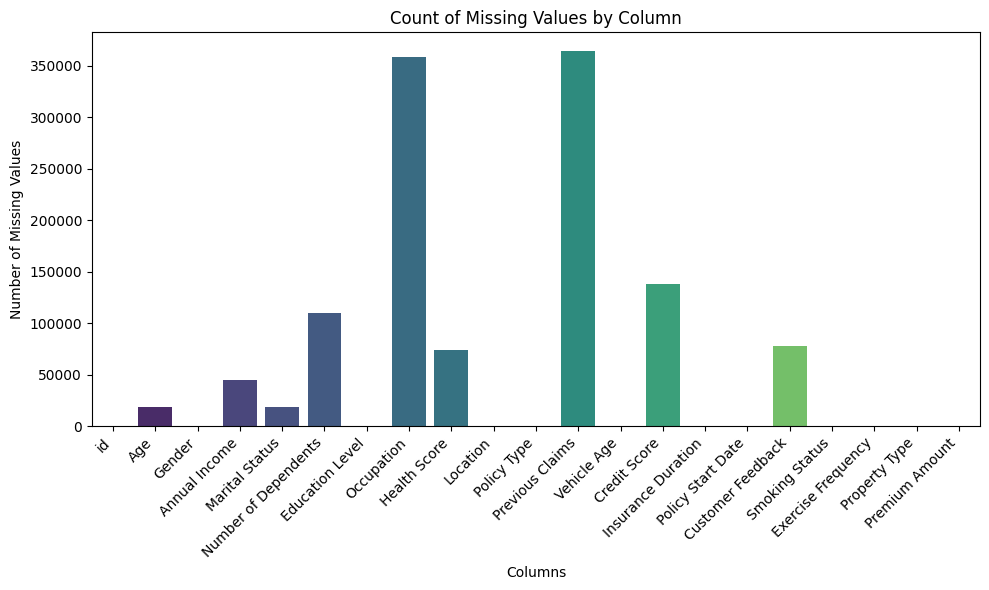

In [ ]:
missing_values = train_data.isna().sum()

# Plot the count of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Count of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.tight_layout()
plt.show()

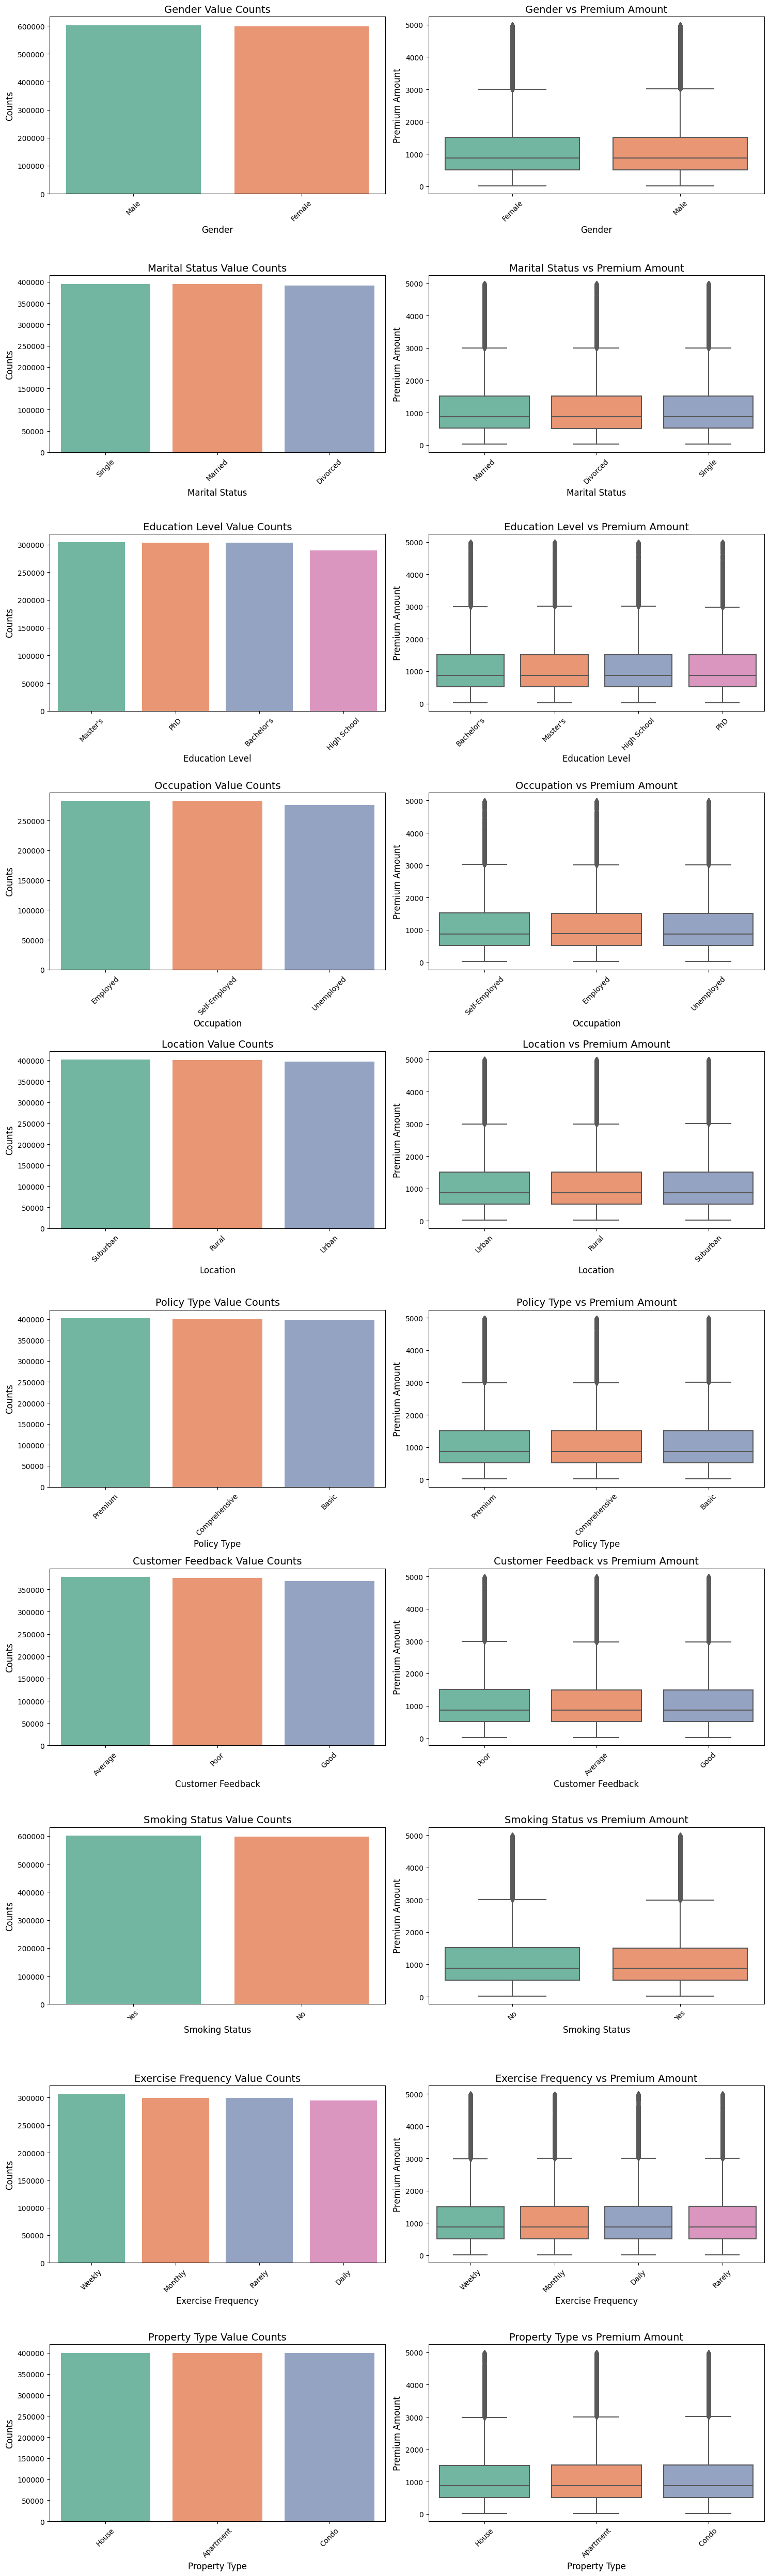

In [ ]:
# Filtered categorical columns
filtered_categorical_columns = [col for col in categorical_columns if col != 'Policy Start Date']

# Setting a color palette
palette = sns.color_palette("Set2", len(filtered_categorical_columns))

# Creating subplots
fig, axes = plt.subplots(len(filtered_categorical_columns), 2, figsize=(15, 5 * len(filtered_categorical_columns)))

# Ensure axes is always 2D
if len(filtered_categorical_columns) == 1:
    axes = [axes]  # Make it iterable for a single column case

for idx, col in enumerate(filtered_categorical_columns):
    # Bar plot for value counts
    sns.barplot(
        x=train_data[col].value_counts().index,
        y=train_data[col].value_counts().values,
        ax=axes[idx][0],
        palette=palette
    )
    axes[idx][0].set_title(f"{col} Value Counts", fontsize=14)
    axes[idx][0].set_xlabel(col, fontsize=12)
    axes[idx][0].set_ylabel("Counts", fontsize=12)
    axes[idx][0].tick_params(axis='x', rotation=45)

    # Box plot for the relationship with the target column
    sns.boxplot(
        x=train_data[col],
        y=train_data["Premium Amount"],
        ax=axes[idx][1],
        palette=palette
    )
    axes[idx][1].set_title(f"{col} vs Premium Amount", fontsize=14)
    axes[idx][1].set_xlabel(col, fontsize=12)
    axes[idx][1].set_ylabel("Premium Amount", fontsize=12)
    axes[idx][1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


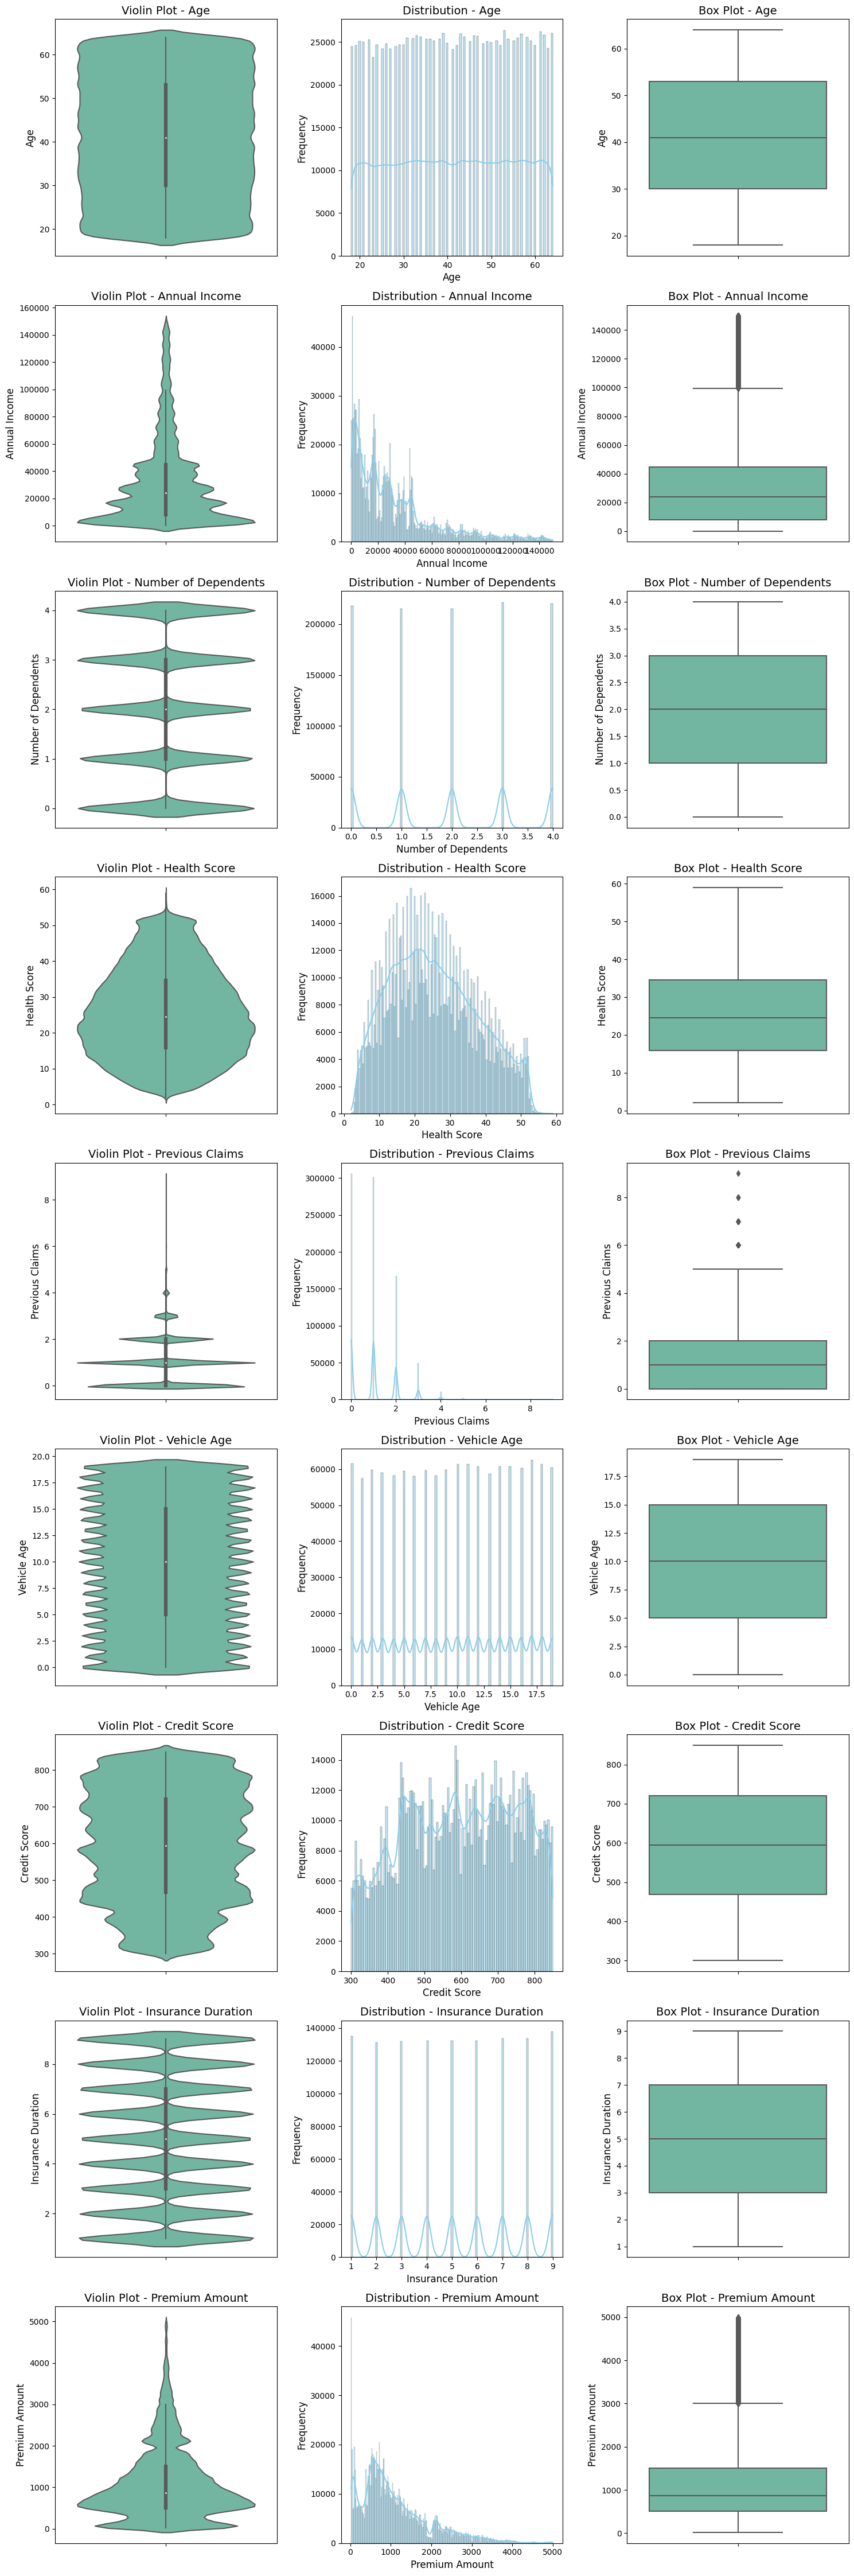

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_numeric_columns = [col for col in numerical_columns if col != 'id']

# Create subplots
n_cols = 3  # Number of plots for each variable (violin, histogram, boxplot)
n_rows = len(filtered_numeric_columns)  # One row for each numerical column
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Iterate through numerical columns
for idx, col in enumerate(filtered_numeric_columns):
    # Violin Plot
    sns.violinplot(data=train_data, y=col, ax=axes[idx, 0], palette="Set2")
    axes[idx, 0].set_title(f"Violin Plot - {col}", fontsize=14)
    axes[idx, 0].set_xlabel("")
    axes[idx, 0].set_ylabel(col, fontsize=12)

    # Histogram (Distribution)
    sns.histplot(train_data[col], kde=True, ax=axes[idx, 1], color="skyblue")
    axes[idx, 1].set_title(f"Distribution - {col}", fontsize=14)
    axes[idx, 1].set_xlabel(col, fontsize=12)
    axes[idx, 1].set_ylabel("Frequency", fontsize=12)

    # Box Plot (Outlier Detection)
    sns.boxplot(data=train_data, y=col, ax=axes[idx, 2], palette="Set2")
    axes[idx, 2].set_title(f"Box Plot - {col}", fontsize=14)
    axes[idx, 2].set_xlabel("")
    axes[idx, 2].set_ylabel(col, fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


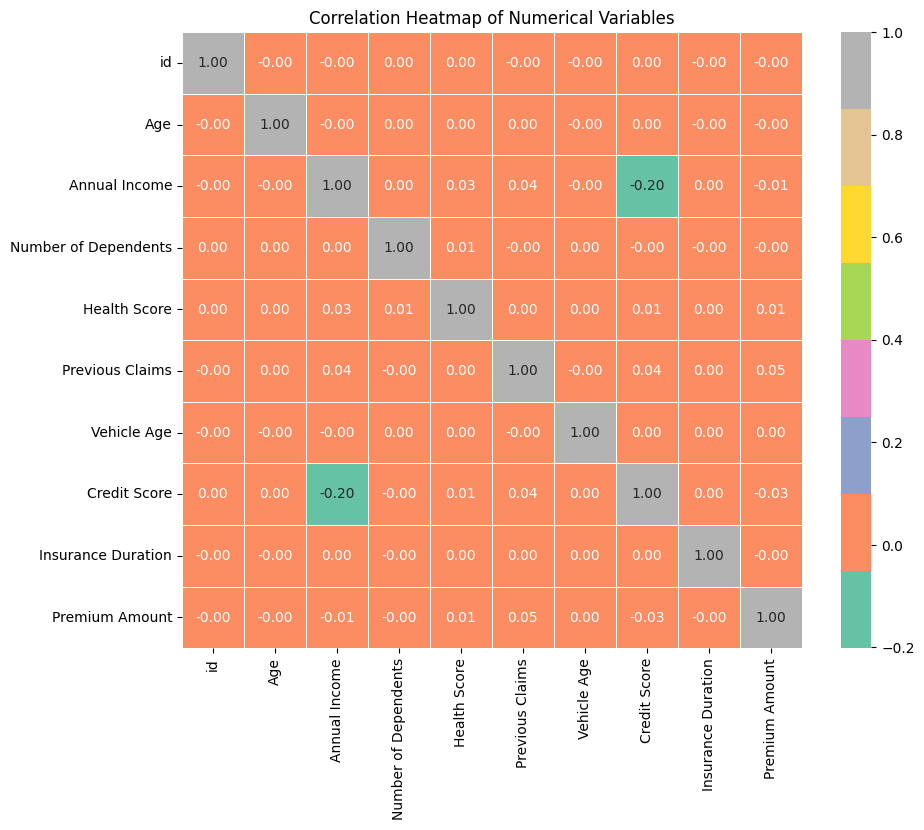

In [ ]:
correlation_matrix = train_data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Set2', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

## Data Preprocessing

In [35]:
def date(df):

    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
    df['Year'] = df['Policy Start Date'].dt.year
    df['Day'] = df['Policy Start Date'].dt.day
    df['Month'] = df['Policy Start Date'].dt.month
    df['Month_name'] = df['Policy Start Date'].dt.month_name()
    df['Day_of_week'] = df['Policy Start Date'].dt.day_name()
    df['Week'] = df['Policy Start Date'].dt.isocalendar().week

    df['Year_sin'] = np.sin(2 * np.pi * df['Year'])
    df['Year_cos'] = np.cos(2 * np.pi * df['Year'])
    min_year = df['Year'].min()
    max_year = df['Year'].max()
    df['Year_sin'] = np.sin(2 * np.pi * (df['Year'] - min_year) / (max_year - min_year))
    df['Year_cos'] = np.cos(2 * np.pi * (df['Year'] - min_year) / (max_year - min_year))
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
    df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
    df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)

    df['Epoch_time'] = df['Policy Start Date'].view(np.int64) / 10**9

    df.drop('Policy Start Date', axis=1, inplace=True)

    return df

train_data = date(train_data)
test_data = date(test_data)

In [36]:
train_data.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Month_name,Day_of_week,Week,Year_sin,Year_cos,Month_sin,Month_cos,Day_sin,Day_cos,Epoch_time
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,December,Saturday,51,-9.510565e-01,0.309017,-2.449294e-16,1.000000e+00,-0.998717,-0.050649,1.703345e+09
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,June,Monday,24,-9.510565e-01,0.309017,1.224647e-16,-1.000000e+00,0.651372,-0.758758,1.686583e+09
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,September,Saturday,39,-9.510565e-01,0.309017,-1.000000e+00,-1.836970e-16,-0.201299,0.979530,1.696087e+09
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,June,Wednesday,24,-2.449294e-16,1.000000,1.224647e-16,-1.000000e+00,0.651372,-0.758758,1.718206e+09
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,December,Wednesday,48,5.877853e-01,-0.809017,-2.449294e-16,1.000000e+00,0.201299,0.979530,1.638372e+09
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,...,May,Friday,20,-5.877853e-01,-0.809017,5.000000e-01,-8.660254e-01,-0.790776,-0.612106,1.653060e+09
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,...,February,Friday,8,9.510565e-01,0.309017,8.660254e-01,5.000000e-01,-0.897805,-0.440394,1.582298e+09
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,August,Monday,32,-5.877853e-01,-0.809017,-8.660254e-01,-5.000000e-01,0.998717,-0.050649,1.659972e+09
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,...,December,Monday,51,9.510565e-01,0.309017,-2.449294e-16,1.000000e+00,0.299363,-0.954139,1.607959e+09
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,August,Sunday,31,9.510565e-01,0.309017,-8.660254e-01,-5.000000e-01,0.394356,0.918958,1.596382e+09


In [37]:
X = train_data.drop(columns=[target_column, 'id', 'Year', 'Day', 'Month', 'Week', 'Month_name', 'Day_of_week'])
y = train_data[target_column]

In [40]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()
print("Categorical Features", categorical_features)
print("Numerirical Features", numerical_features)

Categorical Features ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
Numerirical Features ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Year_sin', 'Year_cos', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Epoch_time']


In [41]:
X.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Smoking Status,Exercise Frequency,Property Type,Year_sin,Year_cos,Month_sin,Month_cos,Day_sin,Day_cos,Epoch_time
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,No,Weekly,House,-9.510565e-01,0.309017,-2.449294e-16,1.000000e+00,-0.998717,-0.050649,1.703345e+09
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,...,Yes,Monthly,House,-9.510565e-01,0.309017,1.224647e-16,-1.000000e+00,0.651372,-0.758758,1.686583e+09
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,Yes,Weekly,House,-9.510565e-01,0.309017,-1.000000e+00,-1.836970e-16,-0.201299,0.979530,1.696087e+09
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,...,Yes,Daily,Apartment,-2.449294e-16,1.000000,1.224647e-16,-1.000000e+00,0.651372,-0.758758,1.718206e+09
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,Yes,Weekly,House,5.877853e-01,-0.809017,-2.449294e-16,1.000000e+00,0.201299,0.979530,1.638372e+09


In [42]:
X_test = test_data.drop(columns=['id', 'Year', 'Day', 'Month', 'Week', 'Month_name', 'Day_of_week'])

In [43]:
X_test.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Smoking Status,Exercise Frequency,Property Type,Year_sin,Year_cos,Month_sin,Month_cos,Day_sin,Day_cos,Epoch_time
0,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,...,Yes,Weekly,House,-9.510565e-01,0.309017,1.224647e-16,-1.000000,0.724793,0.688967,1.685892e+09
1,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,...,Yes,Rarely,Apartment,-2.449294e-16,1.000000,8.660254e-01,-0.500000,-0.968077,-0.250653,1.713799e+09
2,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,...,Yes,Monthly,Condo,-9.510565e-01,0.309017,8.660254e-01,-0.500000,0.848644,0.528964,1.680708e+09
3,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,...,Yes,Daily,House,-9.510565e-01,0.309017,-8.660254e-01,0.500000,-0.937752,0.347305,1.698247e+09
4,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,...,No,Weekly,House,5.877853e-01,-0.809017,-5.000000e-01,0.866025,-0.848644,0.528964,1.637940e+09


In [44]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numerical_pipeline, numerical_features),
        ('categoric', categorical_pipeline, categorical_features)
    ]
)

In [45]:
X_preprocessed = preprocessor.fit_transform(X)
X_test_preprocessed = preprocessor.transform(X_test)

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

## Model Training

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the validation data
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


Mean Squared Error (MSE): 744110.13
R-squared (R2 Score): 0.00


In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # Alpha controls the regularization strength
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_val)
# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 744110.13
R-squared (R2 Score): 0.00


In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)  # Alpha controls the regularization strength
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_val)
# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 744109.34
R-squared (R2 Score): 0.00


In [50]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio balances L1 vs. L2
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_val)
# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 744299.43
R-squared (R2 Score): 0.00


In [51]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_val)
# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 745283.09
R-squared (R2 Score): 0.00


In [52]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_val)
# # Evaluate the model
# mse = mean_squared_error(y_val, y_pred)
# r2 = r2_score(y_val, y_pred)

# # Print evaluation metrics
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"R-squared (R2 Score): {r2:.2f}")

# Output
# Mean Squared Error (MSE): 711579.01
# R-squared (R2 Score): 0.05

In [53]:
import torch
torch.cuda.is_available()

True

In [63]:
!pip install lightgbm

In [64]:
!sudo apt install aptitude

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcwidget4 libsigc++-2.0-0v5 libxapian30
Suggested packages:
  apt-xapian-index aptitude-doc-en | aptitude-doc debtags tasksel
  libcwidget-dev xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcwidget4 libsigc++-2.0-0v5 libxapian30
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,838 kB of archives.
After this operation, 17.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 aptitude-common all 0.8.13-3ubuntu1 [1,719 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsigc++-2.0-0v5 amd64 2.10.4-2ubuntu3 [12.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcwidget4 amd64 0.5.18-5build1 [306 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libxapian30 amd64

In [65]:
!sudo aptitude install cmake

cmake is already installed at the requested version (3.22.1-1ubuntu1.22.04.2)
cmake is already installed at the requested version (3.22.1-1ubuntu1.22.04.2)
No packages will be installed, upgraded, or removed.
0 packages upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Need to get 0 B of archives. After unpacking 0 B will be used.
                            


In [69]:
%cd /content/LightGBM/build

/content/LightGBM/build


In [70]:
!cmake ..

-- OpenCL include directory: /usr/include
CMake Warning (dev) at CMakeLists.txt:196 (find_package):
  Policy CMP0167 is not set: The FindBoost module is removed.  Run "cmake
  --help-policy CMP0167" for policy details.  Use the cmake_policy command to
  set the policy and suppress this warning.

This warning is for project developers.  Use -Wno-dev to suppress it.

-- Using _mm_prefetch
-- Using _mm_malloc
-- Configuring done (0.1s)
-- Generating done (0.1s)
-- Build files have been written to: /content/LightGBM/build


In [71]:
!make -j4

[  2%] Built target lightgbm_capi_objs
[ 89%] Built target lightgbm_objs
[ 92%] Built target _lightgbm
[100%] Built target lightgbm


In [73]:
import lightgbm as lgb

# Check if LightGBM can use GPU
print("LightGBM version:", lgb.__version__)

LightGBM version: 4.5.0


In [74]:
import lightgbm as lgb
import optuna
from sklearn.metrics import mean_squared_error, root_mean_squared_log_error

def objective(trial):
    # Define parameter search space
    param = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        "num_leaves": trial.suggest_int("num_leaves", 200, 512),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 5, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_depth": trial.suggest_int("max_depth", -1, 16),  # -1 means no limit
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-4, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-4, 10.0),
        "device_type": "gpu",  # Enable GPU support
        "seed" : 42

    }

    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    # Train LightGBM model
    model = lgb.train(
        param,
        dtrain,
        valid_sets=[dval],
    )

    # Predict on validation set
    y_val_pred = model.predict(X_val)

    # Compute RMSLE using sklearn's root_mean_squared_log_error
    rmsle = root_mean_squared_log_error(y_val, np.maximum(y_val_pred, 0))
    return rmsle

# Run Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1)

[I 2024-12-31 13:57:52,163] A new study created in memory with name: no-name-549eab06-c4b2-4202-a55e-222d61972691
[W 2024-12-31 13:57:54,298] Trial 0 failed with parameters: {'boosting_type': 'dart', 'num_leaves': 282, 'learning_rate': 0.0008267998077381485, 'feature_fraction': 0.6733788916830956, 'bagging_fraction': 0.7045919145863754, 'bagging_freq': 8, 'min_data_in_leaf': 69, 'max_depth': -1, 'lambda_l1': 0.9221073446705456, 'lambda_l2': 0.018482390807128338} because of the following error: LightGBMError('No OpenCL device found').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-74-eb0f417e8b10>", line 29, in objective
    model = lgb.train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 282, in train
    booster = Booster(params=params, train_set=train_set)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/b

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1267
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 48


LightGBMError: No OpenCL device found

In [76]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.5 MB/s eta 0:00:00


In [80]:
import optuna
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# RMSLE Calculation
def rmsle(y_true, y_pred):
    # Adding 1 to avoid log(0)
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred))**2))

# Objective function for Optuna
def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_state': 42,
        "task_type": "GPU",
        'verbose': 0,
    }

    # Initialize and train the CatBoost model
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=0)

    # Predict on validation data
    y_pred = model.predict(X_val)

    # Calculate RMSLE
    rmsle_score = rmsle(y_val, y_pred)
    return rmsle_score

# Create Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # Adjust the number of trials as needed

# Display the best parameters
print("Best Hyperparameters:", study.best_params)

# Train the CatBoost model with the best parameters
best_params = study.best_params
best_params['random_state'] = 42
best_params['verbose'] = 100

catboost_model = CatBoostRegressor(**best_params)
catboost_model.fit(X_train, y_train)

# Predict on the validation data
y_pred = catboost_model.predict(X_val)

# Evaluate performance using RMSLE
rmsle_value = rmsle(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_value:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


[I 2024-12-31 14:01:58,889] A new study created in memory with name: no-name-9ea81c73-24d0-4724-8c5f-5d2dd8a69e42
[I 2024-12-31 14:02:34,726] Trial 0 finished with value: 1.1427245420328205 and parameters: {'iterations': 416, 'learning_rate': 0.24978385656665664, 'depth': 4, 'l2_leaf_reg': 0.44333146122808503, 'random_strength': 0.15406146441381152, 'bagging_temperature': 0.73571800890283}. Best is trial 0 with value: 1.1427245420328205.
[I 2024-12-31 14:03:02,852] Trial 1 finished with value: 1.1391134626477897 and parameters: {'iterations': 937, 'learning_rate': 0.14831007710265198, 'depth': 5, 'l2_leaf_reg': 7.212804378102654, 'random_strength': 0.039293027689662016, 'bagging_temperature': 0.12997896273492593}. Best is trial 1 with value: 1.1391134626477897.
[I 2024-12-31 14:03:28,965] Trial 2 finished with value: 1.1363430161105177 and parameters: {'iterations': 640, 'learning_rate': 0.2303604091041568, 'depth': 6, 'l2_leaf_reg': 0.5226933293054759, 'random_strength': 0.01622795243

Best Hyperparameters: {'iterations': 607, 'learning_rate': 0.2555859563177805, 'depth': 10, 'l2_leaf_reg': 3.997681478461733, 'random_strength': 0.011418794395133344, 'bagging_temperature': 0.2182511559165734}
0:	learn: 857.1674962	total: 359ms	remaining: 3m 37s
100:	learn: 824.3811441	total: 40s	remaining: 3m 20s
200:	learn: 810.7522505	total: 1m 21s	remaining: 2m 44s
300:	learn: 798.3043407	total: 2m 3s	remaining: 2m 5s
400:	learn: 786.0027540	total: 2m 45s	remaining: 1m 24s
500:	learn: 774.2109900	total: 3m 27s	remaining: 43.9s
600:	learn: 762.4324170	total: 4m 8s	remaining: 2.48s
606:	learn: 761.7688702	total: 4m 11s	remaining: 0us
Root Mean Squared Logarithmic Error (RMSLE): 1.14
R-squared (R2 Score): 0.04



Performance Metrics:
------------------------------
RMSLE: 1.1401
RMSE: 844.8517
MAE: 636.8834
R²: 0.0448
MAPE: 304.49%
[ 4.97665308 15.21468601  2.53255713 10.49702612  7.29423036  4.09272912
 10.35272562  3.23968236  0.68972158  0.5860331   1.80852232  2.06664104
  3.7929927   3.1492422   5.85126826  1.01655483  0.1691178   0.77046798
  0.58268545  0.79750343  0.74592306  0.52326513  0.73465971  0.57244029
  0.77242178  0.37886676  0.61980618  0.6049341   0.74377582  0.75494754
  0.76832561  0.61686921  0.81754912  0.65660006  0.78330684  0.77457385
  0.72064021  0.75101651  2.46334475  1.01959934  0.08641662  0.71374311
  0.70210084  0.49021923  0.67526992  0.69393598  0.75382238  0.58058556]


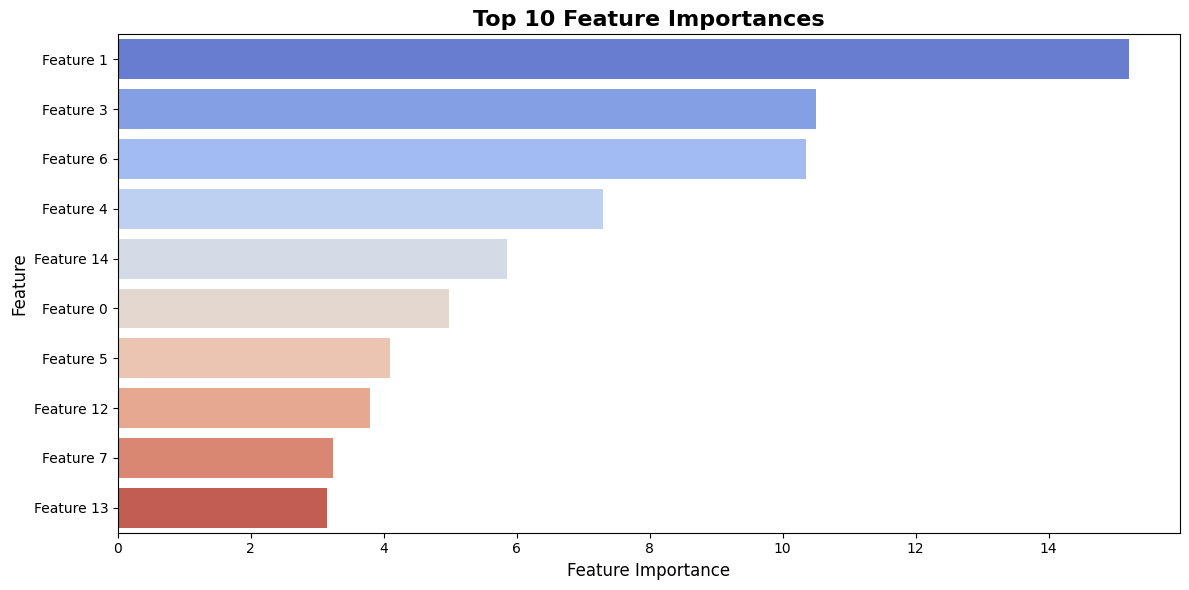

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmsle_value = rmsle(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

# Display performance metrics
print(f"\nPerformance Metrics:\n{'-'*30}")
print(f"RMSLE: {rmsle_value:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# Feature Importance
importances = catboost_model.get_feature_importance()  # Default importance type is 'Split'
print(importances)
# Assuming preprocessor has already been applied to get feature names
# If no preprocessor, use a list of column names like: features = ['feature1', 'feature2', ...]
features = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
sorted_indices = np.argsort(importances)[::-1]

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': [features[i] for i in sorted_indices],
    'Importance': importances[sorted_indices]
})

# Plot top 10 feature importances
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette="coolwarm")
plt.title("Top 10 Feature Importances", fontsize=16, fontweight='bold')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


In [89]:
# Make predictions on the test set
test_predictions = catboost_model.predict(X_test_preprocessed)

# Prepare submission file
submission = pd.DataFrame({
    'id': test_data['id'],  # Ensure 'test_data' contains 'id' column
    'Premium Amount': test_predictions
})

# Save the submission to a CSV file
submission.to_csv("submission.csv", index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv
